In [1]:
import torch
import segmentation_models_pytorch as smp
from torch import nn
from src.conf.config import CONFIG
from src.dl.inferer import Inferer
from src.dl.lightning_model import SegModel

/home/leos/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from 

In [2]:
model = smp.Unet(
    encoder_name="resnext50_32x4d", 
    classes=2
)

# model = smp.FPN(
#     encoder_name="resnext50_32x4d",
#     classes=2,
#     decoder_merge_policy='cat'
# )

config = CONFIG
lightning_model = SegModel.from_conf(model, config)
ckpt = lightning_model.fm.model_checkpoint(config.inference_args.model_weights)
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
lightning_model.load_state_dict(checkpoint['state_dict'], strict=False)

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(lightning_model, config)

In [4]:
infobj = inf.run()

Prediction for: test_1


/home/leos/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function extract_patches is deprecated; The function feature_extraction.image.extract_patches has been deprecated in 0.22 and will be removed in 0.24.



Prediction for: test_10
Prediction for: test_11
Prediction for: test_12
Prediction for: test_13
Prediction for: test_14
Prediction for: test_2
Prediction for: test_3
Prediction for: test_4
Prediction for: test_5
Prediction for: test_6
Prediction for: test_7
Prediction for: test_8
Prediction for: test_9


In [5]:
# inf.plot_histograms()

In [6]:
# inf.plot_predictions()

In [7]:
inf.post_process()

In [8]:
# inf.plot_segmentations()

In [9]:
score_df = inf.benchmark(save=True)
score_df

,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_Sensitivity,inst_Precision,splits,merges
test_1_metrics,0.295250,0.309133,0.528108,0.307321,0.657601,0.467337,0.322543,0.848024,0.188211,1.859674
test_10_metrics,0.400259,0.414013,0.564169,0.418001,0.673671,0.620482,0.487574,0.853002,0.275185,1.496688
test_11_metrics,0.338629,0.390837,0.499923,0.255870,0.641874,0.398630,0.270195,0.759791,0.395459,1.630517
test_12_metrics,0.433848,0.449279,0.651086,0.418951,0.683552,0.612903,0.488318,0.822835,0.208343,0.911621
test_13_metrics,0.392275,0.405728,0.664915,0.405913,0.655731,0.619024,0.462104,0.937313,0.286752,2.003308
test_14_metrics,0.511369,0.531355,0.679279,0.513611,0.693374,0.740741,0.647482,0.865385,0.350148,1.136243
test_2_metrics,0.292075,0.292369,0.570170,0.290653,0.624904,0.465116,0.367347,0.633803,0.127654,0.941459
test_3_metrics,0.420963,0.452834,0.601699,0.387587,0.678825,0.570968,0.449239,0.783186,0.222742,1.408251
test_4_metrics,0.481343,0.502275,0.584742,0.430864,0.705690,0.610556,0.511962,0.756184,0.338831,1.363400
test_5_metrics,0.356393,0.386039,0.553950,0.393302,0.703286,0.559235,0.417582,0.846325,0.277399,2.029151


In [10]:
score_df.loc["averages_for_the_set"]

AJI                 0.375908
AJI_plus            0.392668
DICE2               0.581413
PQ                  0.362016
SQ                  0.666265
DQ                  0.541011
inst_Sensitivity    0.418334
inst_Precision      0.786757
splits              0.235388
merges              1.357716
Name: averages_for_the_set, dtype: float64

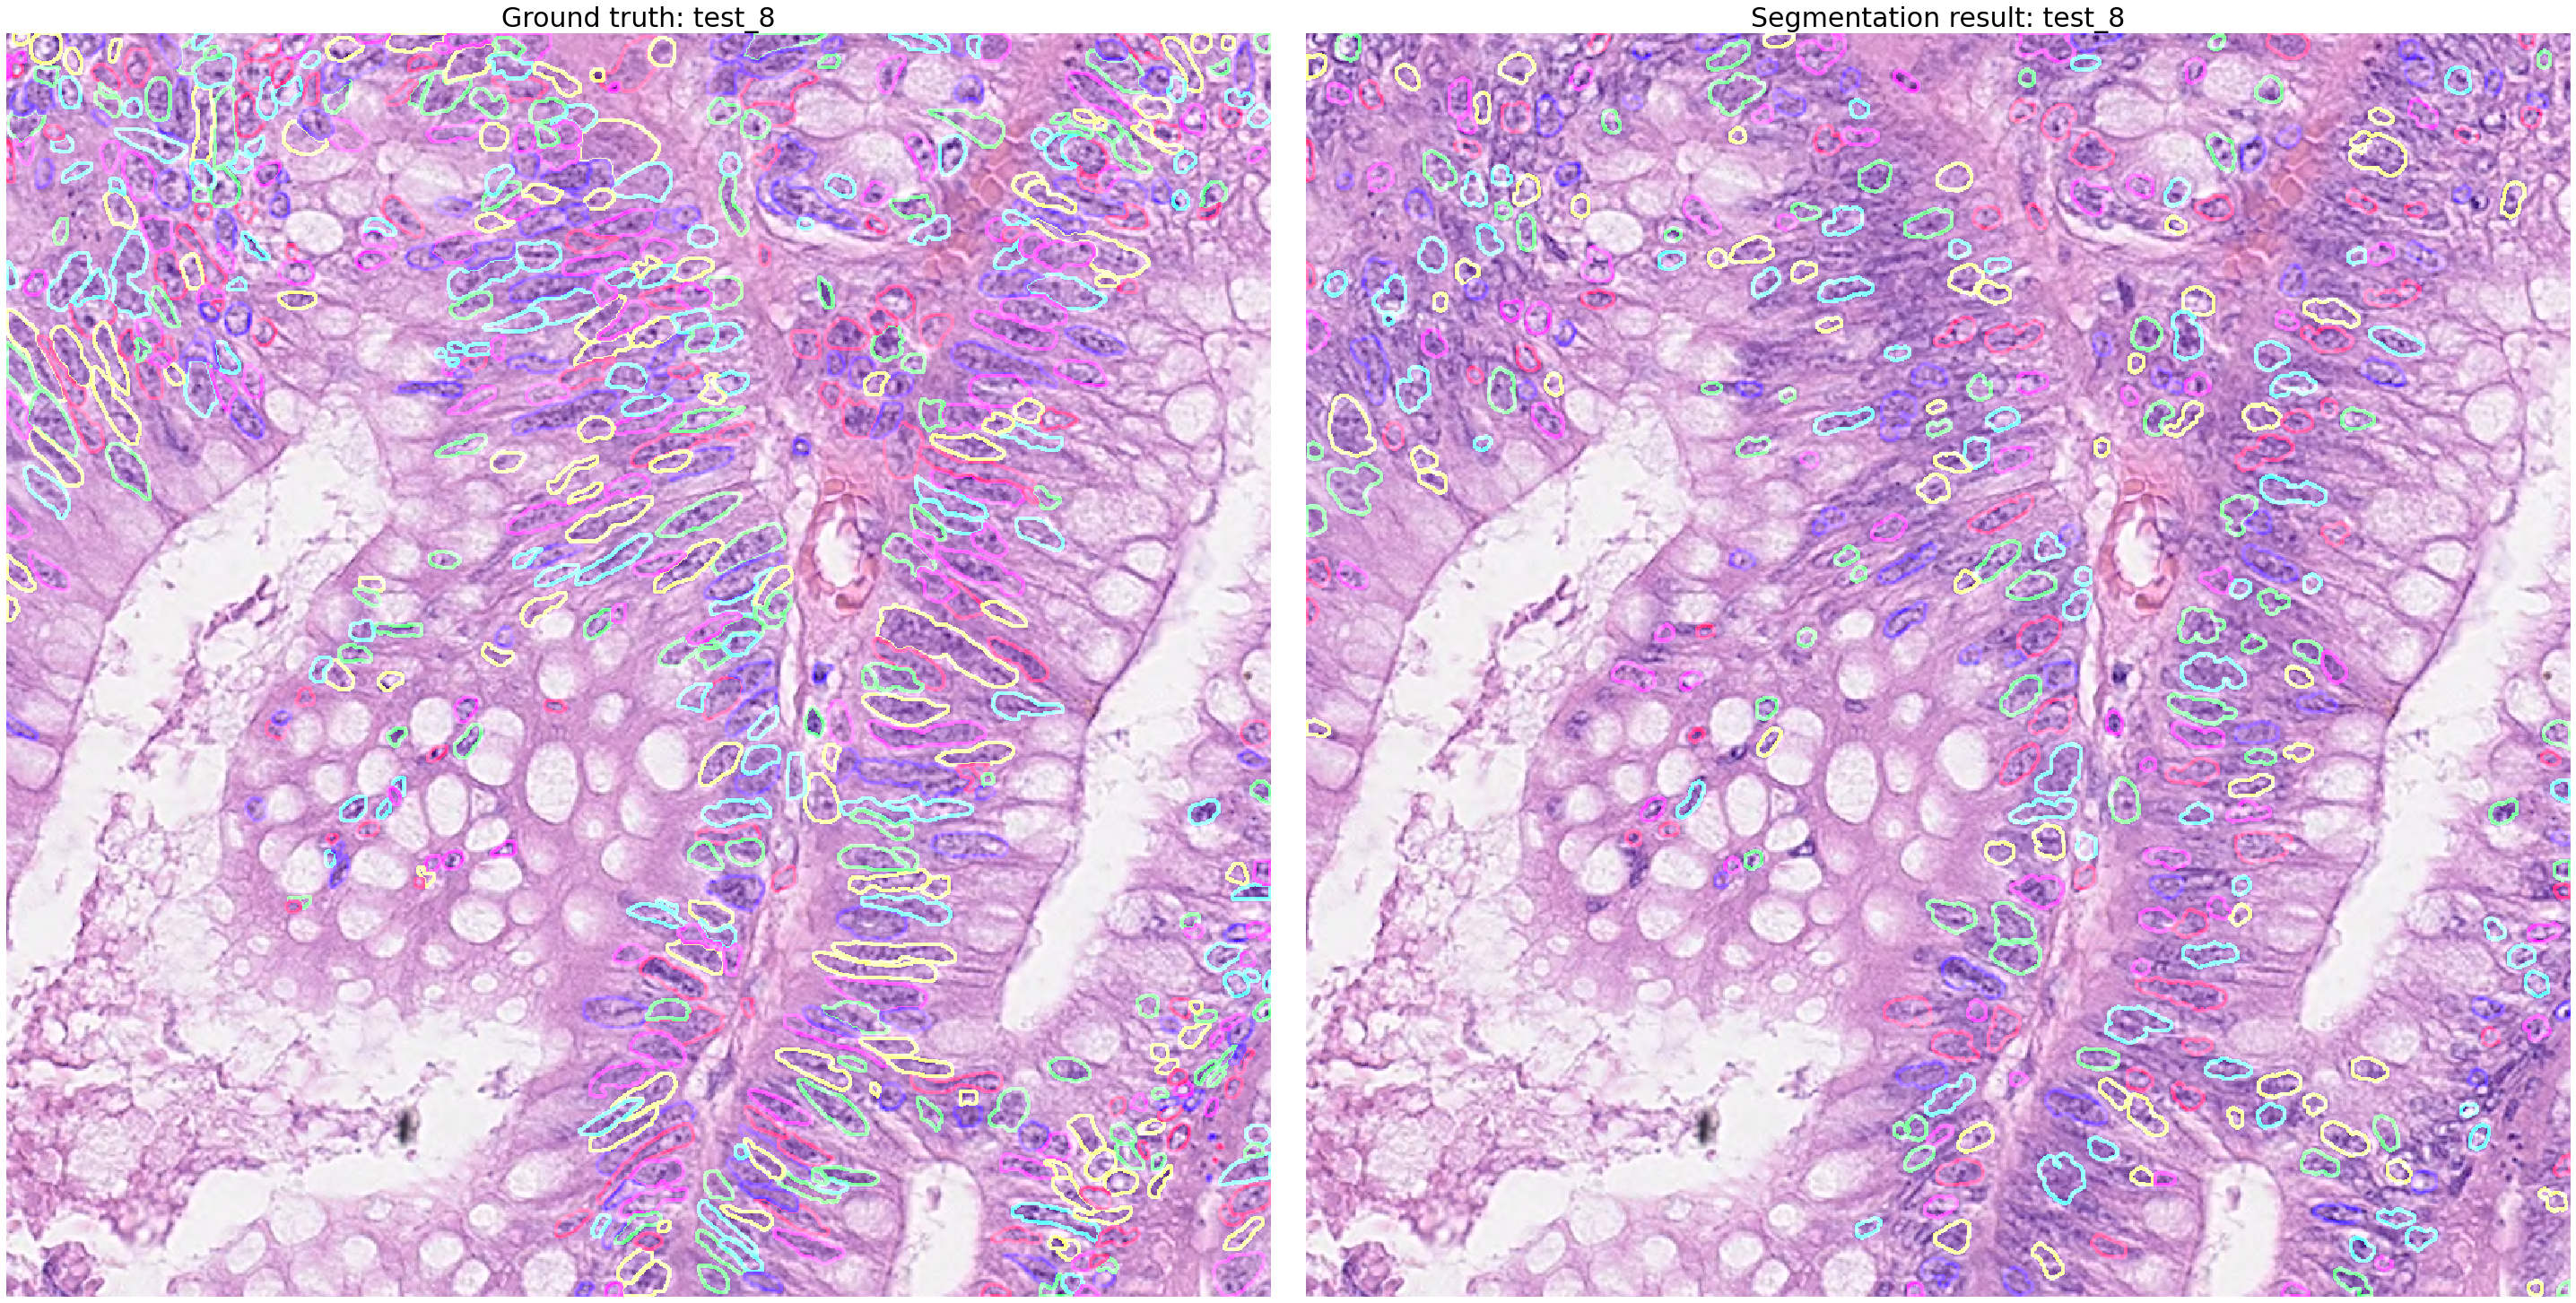

In [11]:
inf.plot_overlays(ixs=[12], save=False)